In [77]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

##Read the dataset

In [78]:
df = pd.read_csv(r"C:\Users\hp\Desktop\final loan dataset\DSC-CapstoneProject-2\Data\Final_Loans_dataset.csv")
df.head()

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
0,209801.0,FEMALE,37.0,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,II,B10,KES,5000.00,642000.00,"59,826.37",204.0,DOUBTFUL,B9,"453,208.12",CURRENT
1,315048.0,MALE,41.0,3.0,SELF-EMPLOYED,NaN,MARRIED,529.0,JJ,B20,KES,0.00,78000.00,"6,149.03",295.0,DOUBTFUL,B9,"68,917.29",EXPIRED
2,145878.0,MALE,36.0,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,FF,A5,KES,1294783.78,80000.00,"7,439.02",0.0,NORMAL,A1-A6,4.84,CURRENT
3,295535.0,MALE,41.0,5.0,EMPLOYED,NaN,0,618.0,HH,B20,KES,347554.00,172000.00,"16,062.90",323.0,DOUBTFUL,B9,"195,045.53",EXPIRED
4,493960.0,MALE,41.0,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,DD,A5,KES,4210957.00,300502.44,"28,098.61",0.0,NORMAL,A1-A6,247.18,CURRENT


##Display all the casic information of the dataset


In [79]:
df.columns

Index(['ID', 'GENDER', 'AGE', 'NO_DEFAULT_LOAN', 'EMPLOYMENT_STATUS', 'SECTOR',
       'MARITAL_STATUS', 'CREDIT_SCORE', 'SCOREGRADE', 'CRR', 'CURRENCY',
       'NET INCOME', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'RISK_GRADE', 'AREARS', 'LOAN_STATUS'],
      dtype='object')

In [80]:
df.describe()

,ID,AGE,NO_DEFAULT_LOAN,CREDIT_SCORE,NET INCOME,PRINCIPAL_AMOUNT,OD_DAYS
count,18196.000000,18109.000000,17921.000000,17921.000000,1.776200e+04,1.819600e+04,18196.000000
mean,253791.005496,38.239273,1.045143,668.165225,2.770445e+06,1.985309e+05,9.487635
std,142330.186635,15.259873,1.593557,73.685554,5.592813e+06,2.508291e+05,38.745497
min,10010.000000,-1595.000000,0.000000,0.000000,0.000000e+00,1.000000e+03,0.000000
25%,128677.000000,31.000000,0.000000,618.000000,4.262687e+05,1.800000e+04,0.000000
50%,253241.000000,37.000000,0.000000,665.000000,1.123309e+06,1.000000e+05,0.000000
75%,376761.250000,44.000000,2.000000,720.000000,2.820720e+06,2.805882e+05,0.000000
max,499999.000000,93.000000,15.000000,830.000000,1.338524e+08,1.445752e+06,323.000000


In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18196 entries, 0 to 18195
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         18196 non-null  float64
 1   GENDER                     17748 non-null  object 
 2   AGE                        18109 non-null  float64
 3   NO_DEFAULT_LOAN            17921 non-null  float64
 4   EMPLOYMENT_STATUS          18196 non-null  object 
 5   SECTOR                     18069 non-null  object 
 6   MARITAL_STATUS             18196 non-null  object 
 7   CREDIT_SCORE               17921 non-null  float64
 8   SCOREGRADE                 17921 non-null  object 
 9   CRR                        18196 non-null  object 
 10  CURRENCY                   18196 non-null  object 
 11  NET INCOME                 17762 non-null  float64
 12  PRINCIPAL_AMOUNT           18196 non-null  float64
 13  EMI                        18196 non-null  obj

In [82]:
# Keep only the first 18,196 rows
df_1= df.head(18196)

# Check the shape of the cleaned dataset
print("Rows after cleaning:", df_1.shape[0])
df_1.to_csv(r"C:\Users\hp\Desktop\final loan dataset\DSC-CapstoneProject-2\Data\Final_Loans_dataset.csv", index=False)


Rows after cleaning: 18196


##Check for any missing values from the rows

In [83]:
print(df_1.isnull().sum())

ID                             0
GENDER                       448
AGE                           87
NO_DEFAULT_LOAN              275
EMPLOYMENT_STATUS              0
SECTOR                       127
MARITAL_STATUS                 0
CREDIT_SCORE                 275
SCOREGRADE                   275
CRR                            0
CURRENCY                       0
NET INCOME                   434
PRINCIPAL_AMOUNT               0
EMI                            0
OD_DAYS                        0
PRUDENTIAL_CLASSIFICATION      0
RISK_GRADE                     0
AREARS                         0
LOAN_STATUS                    0
dtype: int64


##Chose to drop the missing values


In [84]:
df_1= df_1.dropna(subset=["CREDIT_SCORE"])
df_1= df_1.dropna(subset=["NET INCOME"])
df_1= df_1.dropna(subset=["GENDER"])
df_1= df_1.dropna(subset=["SECTOR"])

In [85]:
df_1.isnull().sum()

ID                            0
GENDER                        0
AGE                          40
NO_DEFAULT_LOAN               0
EMPLOYMENT_STATUS             0
SECTOR                        0
MARITAL_STATUS                0
CREDIT_SCORE                  0
SCOREGRADE                    0
CRR                           0
CURRENCY                      0
NET INCOME                    0
PRINCIPAL_AMOUNT              0
EMI                           0
OD_DAYS                       0
PRUDENTIAL_CLASSIFICATION     0
RISK_GRADE                    0
AREARS                        0
LOAN_STATUS                   0
dtype: int64

In [86]:

# Handle missing values by filling with column mean (or you could drop rows)
df_1['AGE'].fillna(df_1['AGE'].mean(), inplace=True)

# Finally, check the cleaned dataframe
print(df_1.head())


         ID  GENDER   AGE  NO_DEFAULT_LOAN EMPLOYMENT_STATUS  \
0  209801.0  FEMALE  37.0              7.0          EMPLOYED   
2  145878.0    MALE  36.0              6.0          EMPLOYED   
4  493960.0    MALE  41.0              1.0          EMPLOYED   
6  280570.0  FEMALE  38.0              0.0          EMPLOYED   
7   45325.0  FEMALE  32.0              0.0          EMPLOYED   

                                SECTOR MARITAL_STATUS  CREDIT_SCORE  \
0                  FINANCE & INSURANCE        MARRIED         615.0   
2            TRANSPORT & COMMUNICATION        MARRIED         665.0   
4                  FINANCE & INSURANCE         SINGLE         696.0   
6                  FINANCE & INSURANCE         SINGLE         632.0   
7  SOCIAL, COMMUNITY & PERSONAL SERVIC        MARRIED         622.0   

  SCOREGRADE  CRR CURRENCY  NET INCOME  PRINCIPAL_AMOUNT        EMI  OD_DAYS  \
0         II  B10      KES     5000.00         642000.00  59,826.37    204.0   
2         FF   A5      KES  

C:\Users\hp\AppData\Local\Temp\ipykernel_7008\2986622001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['AGE'].fillna(df_1['AGE'].mean(), inplace=True)


In [87]:
df_1.isnull().sum()

ID                           0
GENDER                       0
AGE                          0
NO_DEFAULT_LOAN              0
EMPLOYMENT_STATUS            0
SECTOR                       0
MARITAL_STATUS               0
CREDIT_SCORE                 0
SCOREGRADE                   0
CRR                          0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_AMOUNT             0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
RISK_GRADE                   0
AREARS                       0
LOAN_STATUS                  0
dtype: int64

In [88]:
# Show the data types of all columns
df_1.dtypes 

ID                           float64
GENDER                        object
AGE                          float64
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object

In [89]:
# Use .loc to ensure you are modifying the original DataFrame
df_1.loc[:, 'AGE'] = pd.to_numeric(df_1['AGE'], errors='coerce')
df_1.loc[:, 'PRINCIPAL_AMOUNT'] = pd.to_numeric(df_1['PRINCIPAL_AMOUNT'], errors='coerce')

In [90]:
df_1.dtypes

ID                           float64
GENDER                        object
AGE                          float64
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object

In [91]:
df_1["EMI"] = df_1["EMI"].str.replace(",", "").astype(float)
df_1["AREARS"] = df_1["AREARS"].str.replace(",", "").astype(float)

In [92]:
df_1.dtypes

ID                           float64
GENDER                        object
AGE                          float64
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                          float64
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                       float64
LOAN_STATUS                   object
dtype: object

In [93]:
df_1.duplicated().sum()

0

In [94]:
df_1 = df_1[(df_1['AGE'] >= 18) & (df_1['AGE'] <= 100)]

In [95]:
df_1.head()

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
0,209801.0,FEMALE,37.0,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,II,B10,KES,5000.00,642000.00,59826.37,204.0,DOUBTFUL,B9,453208.12,CURRENT
2,145878.0,MALE,36.0,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,FF,A5,KES,1294783.78,80000.00,7439.02,0.0,NORMAL,A1-A6,4.84,CURRENT
4,493960.0,MALE,41.0,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,DD,A5,KES,4210957.00,300502.44,28098.61,0.0,NORMAL,A1-A6,247.18,CURRENT
6,280570.0,FEMALE,38.0,0.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,632.0,HH,B9,KES,44280.00,82000.72,6802.81,111.0,SUBSTANDARD,B8,26582.90,CURRENT
7,45325.0,FEMALE,32.0,0.0,EMPLOYED,"SOCIAL, COMMUNITY & PERSONAL SERVIC",MARRIED,622.0,HH,A5,KES,1000139.59,339584.95,15279.32,19.0,NORMAL,A1-A6,15519.98,CURRENT


DETECTING AND HANDLING OLF OUTLIERS


In [96]:

# List of numerical columns to check for outliers
numeric_cols = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'PRINCIPAL_AMOUNT', 
                'EMI', 'OD_DAYS', 'AREARS']

def detect_outliers_iqr(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df_1[(df_1[column] < lower_bound) | (df_1[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    # Calculate mean and standard deviation
    mean = df_1[column].mean()
    std = df_1[column].std()
    
    # Calculate z-scores
    z_scores = np.abs((df[column] - mean) / std)
    
    # Identify outliers
    outliers = df_1[z_scores > threshold][column]
    return outliers

# Analyze outliers for each numerical column
print("Outlier Detection Results:")
print("-" * 50)

for column in numeric_cols:
    # Using IQR method
    iqr_outliers, lower, upper = detect_outliers_iqr(df, column)
    
    # Using Z-score method
    zscore_outliers = detect_outliers_zscore(df, column)
    
    print(f"\n{column}:")
    print(f"IQR Method - Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Number of outliers (IQR): {len(iqr_outliers)}")
    print(f"Number of outliers (Z-score): {len(zscore_outliers)}")
    
    # Print some sample outliers if they exist
    if len(iqr_outliers) > 0:
        print(f"Sample IQR outliers: {iqr_outliers.head().values}")
    
    # Optional: You can add more detailed statistics
    print(f"Mean: {df_1[column].mean():.2f}")
    print(f"Median: {df_1[column].median():.2f}")
    print(f"Std Dev: {df_1[column].std():.2f}")

# Optional: Visualization using box plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_1[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Outlier Detection Results:
--------------------------------------------------

AGE:
IQR Method - Lower Bound: 13.00, Upper Bound: 61.00
Number of outliers (IQR): 262
Number of outliers (Z-score): 156
Sample IQR outliers: [63. 65. 68. 67. 65.]
Mean: 37.96
Median: 37.00
Std Dev: 8.99

CREDIT_SCORE:
IQR Method - Lower Bound: 466.50, Upper Bound: 870.50
Number of outliers (IQR): 36
Number of outliers (Z-score): 36
Sample IQR outliers: [0. 0. 0. 0. 0.]
Mean: 667.67
Median: 664.50
Std Dev: 73.58

NET INCOME:
IQR Method - Lower Bound: -3156393.25, Upper Bound: 6406987.95
Number of outliers (IQR): 1791
Number of outliers (Z-score): 284
Sample IQR outliers: [ 9042933.   14910210.06 21335490.   15899978.85  9074976.  ]
Mean: 2760082.69
Median: 1118671.79
Std Dev: 5602460.69

PRINCIPAL_AMOUNT:
IQR Method - Lower Bound: -354125.00, Upper Bound: 632875.00
Number of outliers (IQR): 1354
Number of outliers (Z-score): 583
Sample IQR outliers: [642000.   751000.   917143.22 800000.   766000.  ]
Mean: 1

C:\Users\hp\AppData\Local\Temp\ipykernel_7008\3507151588.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_1[z_scores > threshold][column]
C:\Users\hp\AppData\Local\Temp\ipykernel_7008\3507151588.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_1[z_scores > threshold][column]
C:\Users\hp\AppData\Local\Temp\ipykernel_7008\3507151588.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_1[z_scores > threshold][column]
C:\Users\hp\AppData\Local\Temp\ipykernel_7008\3507151588.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_1[z_scores > threshold][column]


TypeError: unsupported operand type(s) for -: 'str' and 'float'

DATA VISUALIZATION TECHNIQUES


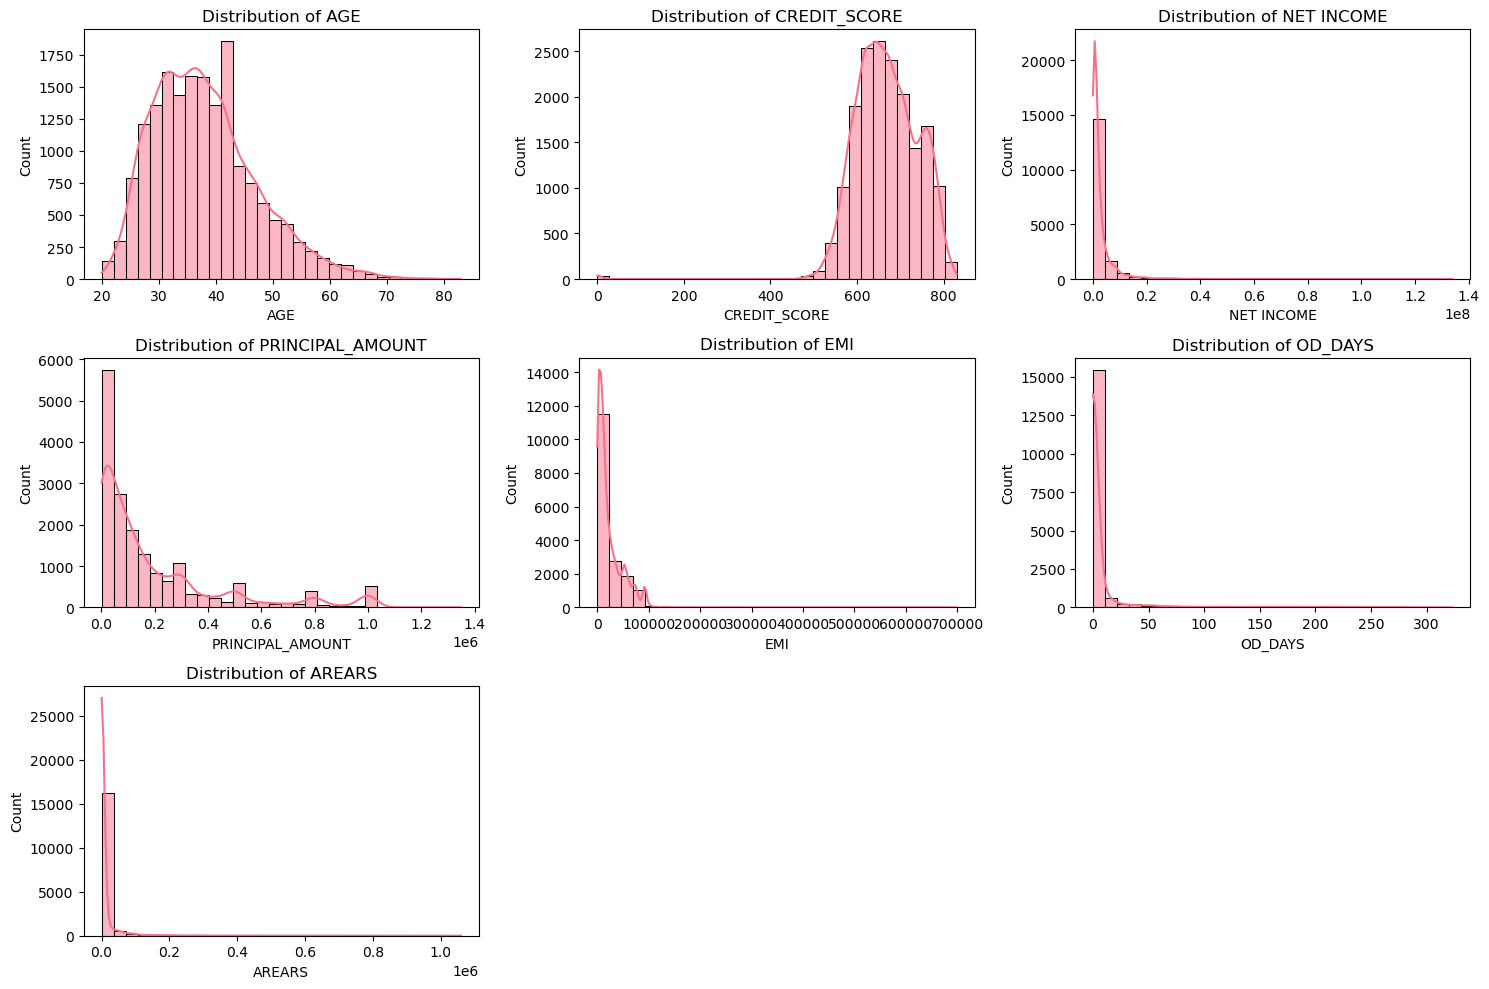

In [ ]:

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# 1. Distribution Analysis
plt.figure(figsize=(15, 10))

# Histograms for numerical variables
numeric_cols = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS', 'AREARS']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_1, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()



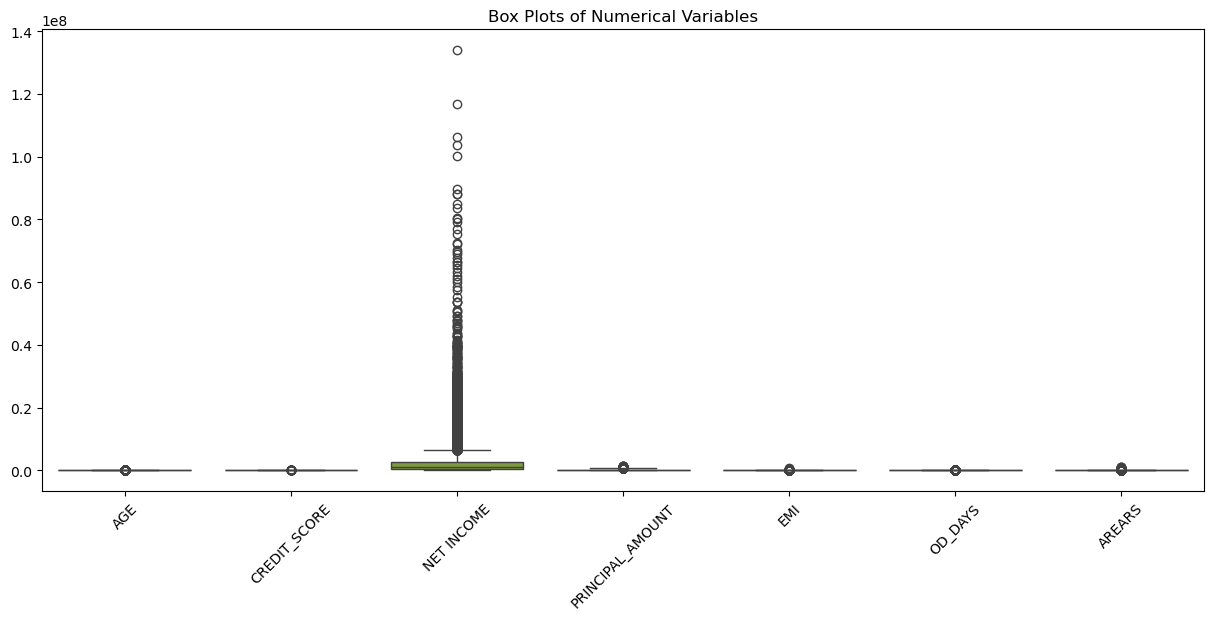

In [ ]:
# 2. Box Plots for Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_1[numeric_cols])
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Variables')
plt.show()


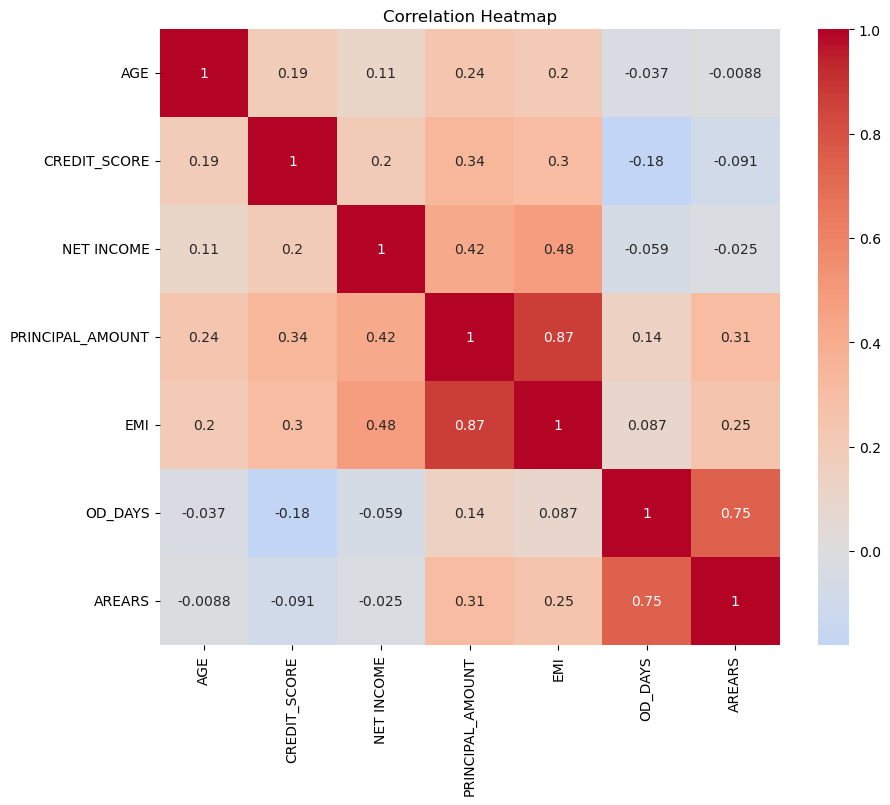

In [ ]:
# 3. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

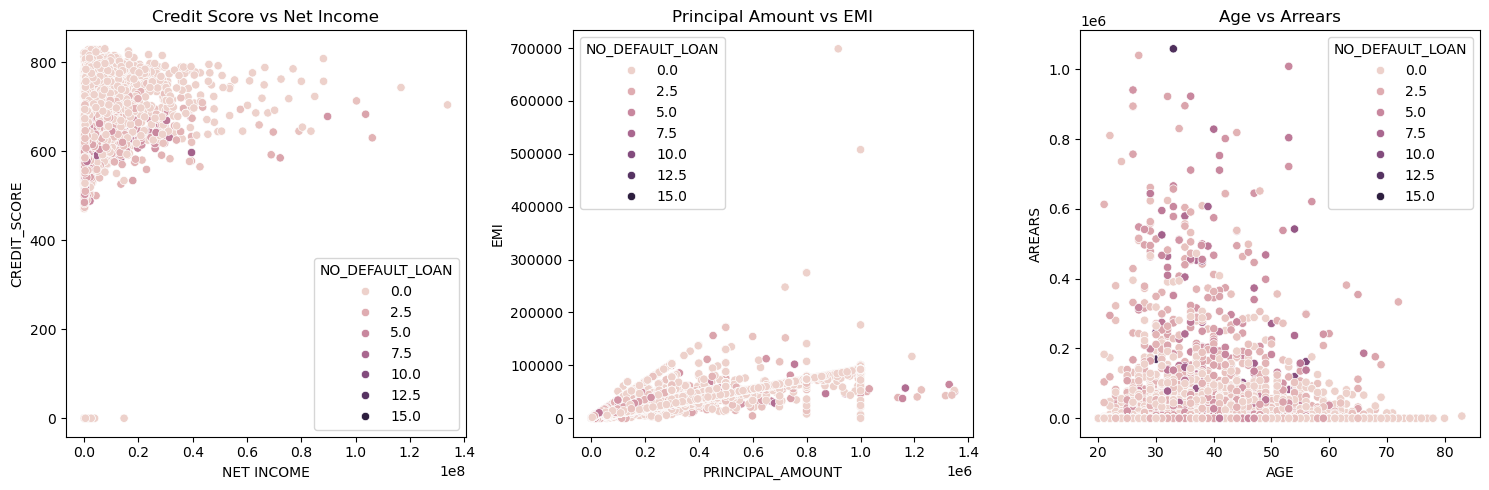

In [ ]:
# 4. Scatter Plots for Relationships
plt.figure(figsize=(15, 5))

# Credit Score vs Net Income
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_1, x='NET INCOME', y='CREDIT_SCORE', hue='NO_DEFAULT_LOAN')
plt.title('Credit Score vs Net Income')

# Principal Amount vs EMI
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_1, x='PRINCIPAL_AMOUNT', y='EMI', hue='NO_DEFAULT_LOAN')
plt.title('Principal Amount vs EMI')

# Age vs Arrears
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_1, x='AGE', y='AREARS', hue='NO_DEFAULT_LOAN')
plt.title('Age vs Arrears')
plt.tight_layout()
plt.show()

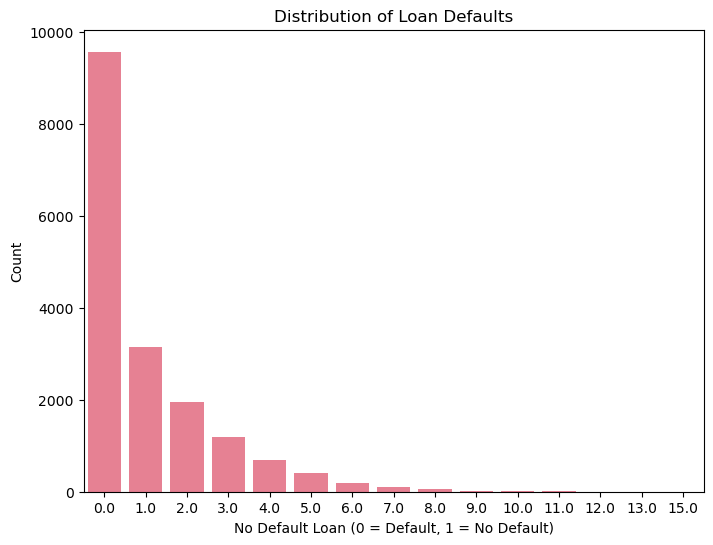

In [ ]:
# 5. Categorical Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df_1, x='NO_DEFAULT_LOAN')
plt.title('Distribution of Loan Defaults')
plt.xlabel('No Default Loan (0 = Default, 1 = No Default)')
plt.ylabel('Count')
plt.show()

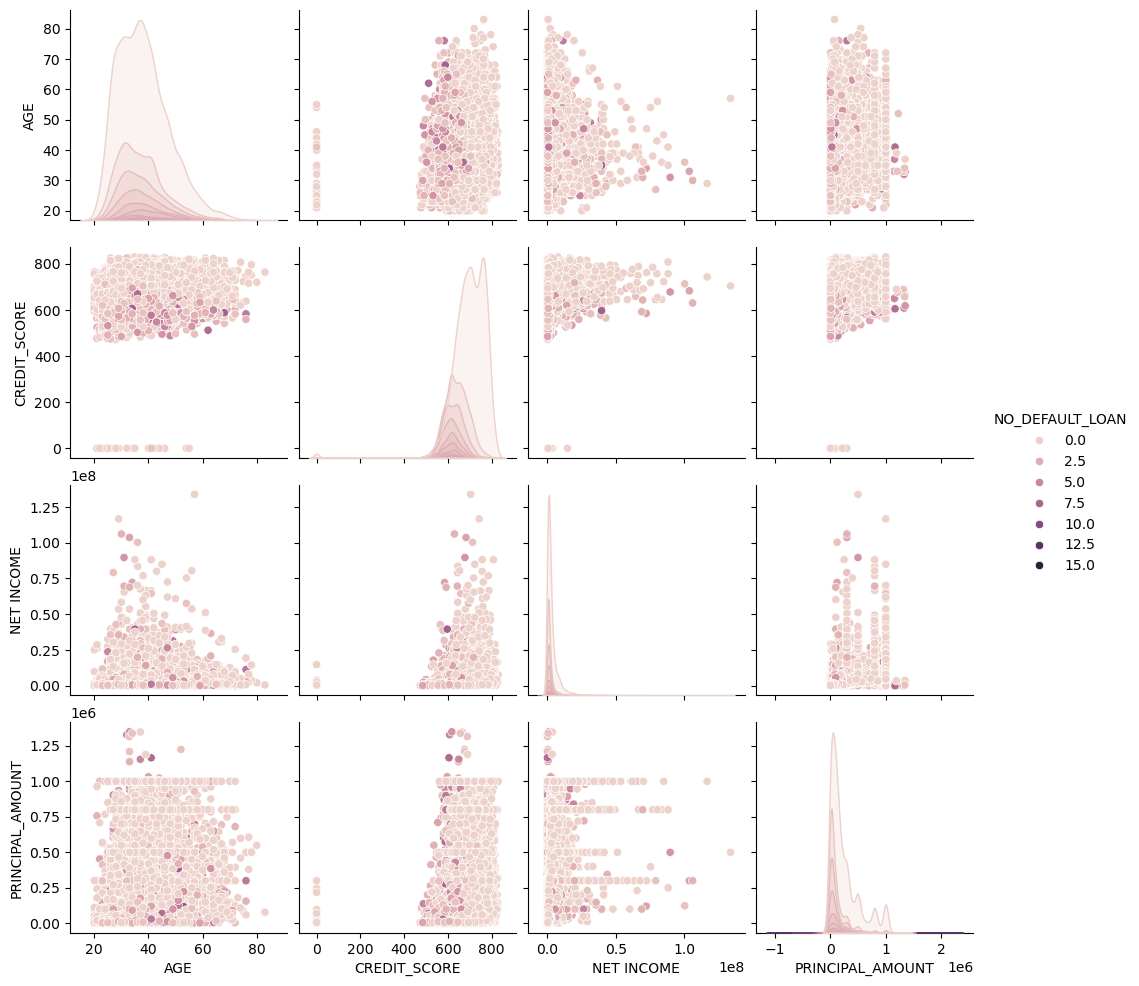

In [ ]:
# 7. Pair Plot (for selected variables)
selected_cols = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'PRINCIPAL_AMOUNT', 'NO_DEFAULT_LOAN']
sns.pairplot(df_1[selected_cols], hue='NO_DEFAULT_LOAN')
plt.show()

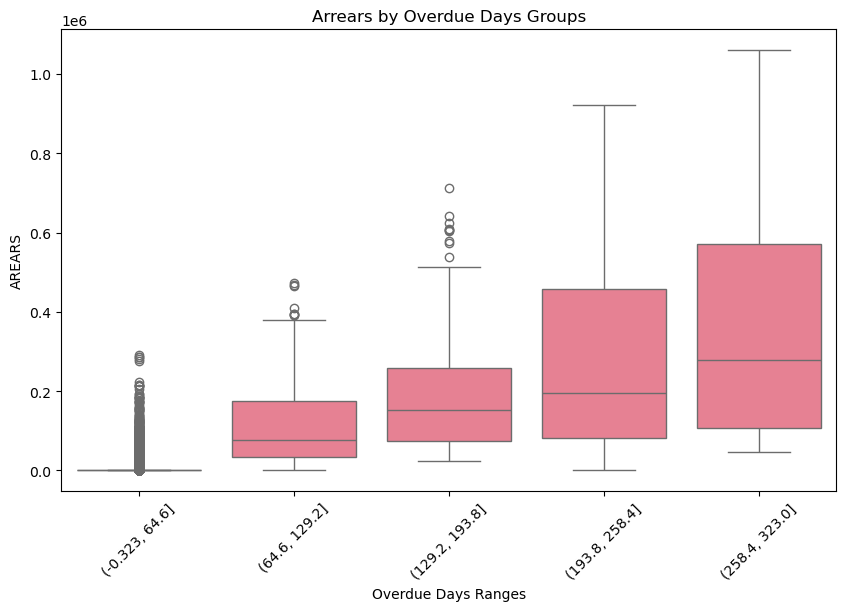

In [ ]:
 #8. Time-based Analysis (if OD_DAYS represents days)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1, x=pd.cut(df['OD_DAYS'], bins=5), y='AREARS')
plt.xticks(rotation=45)
plt.title('Arrears by Overdue Days Groups')
plt.xlabel('Overdue Days Ranges')
plt.show()